In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import seaborn as sns
import chardet

# Data Understanding

In [2]:
DATA_PATH = Path('../../data')

In [3]:
with open(DATA_PATH.joinpath('raw', 'game_logs.csv'), 'rb') as f:
    result = chardet.detect(f.readline())

In [4]:
result['encoding']

'UTF-16'

In [5]:
df = pd.read_csv(DATA_PATH.joinpath('raw', 'game_logs.csv'), encoding=result['encoding'])

/var/folders/n2/pk82njb95y52mychzbkmz5zm0000gn/T/ipykernel_20033/2054198856.py:1: DtypeWarning: Columns (13,15,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH.joinpath('raw', 'game_logs.csv'), encoding=result['encoding'])


In [6]:
df.shape

(54345, 161)

In [7]:
df.head()

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,HomeTeamScore,NumberofOuts,DayNight,Completition_Information,Forfeit_Information,Protest_Information,BallParkID,Attendance,LengthofGame,VisitingTeam_LineScore,HomeTeam_LineScore,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,HomePlateUmp_ID,HomePlateUmp_Name,1BUmp_ID,1BUmp_Name,2BUmp_ID,2BUmp_Name,3BUmp_ID,3BUmp_Name,LFUmp_ID,LFUmp_Name,RFUmp_ID,RFUmp_Name,VisitingTeamManager_ID,VisitingTeamManager_Name,HomeTeamManager_ID,HomeTeamManager_Name,WinningPitcher_ID,WinningPitcher_Name,LosingPitcher_ID,LosingPitcher_Name,SavingPitcher_ID,SavingPitcher_Name,GameWinningRBIBatter_ID,GameWinningRBIBatter_Name,VisitingTeam_StartingPitcher_ID,VisitingTeam_StartingPitcher_Name,HomeTeam_StartingPitcher_ID,HomeTeam_StartingPitcher_Name,VisitingTeam_Player1_ID,VisitingTeam_Player1_Name,VisitingTeam_Player1_Position,VisitingTeam_Player2_ID,VisitingTeam_Player2_Name,VisitingTeam_Player2_Position,VisitingTeam_Player3_ID,VisitingTeam_Player3_Name,VisitingTeam_Player3_Position,VisitingTeam_Player4_ID,VisitingTeam_Player4_Name,VisitingTeam_Player4_Position,VisitingTeam_Player5_ID,VisitingTeam_Player5_Name,VisitingTeam_Player5_Position,VisitingTeam_Player6_ID,VisitingTeam_Player6_Name,VisitingTeam_Player6_Position,VisitingTeam_Player7_ID,VisitingTeam_Player7_Name,VisitingTeam_Player7_Position,VisitingTeam_Player8_ID,VisitingTeam_Player8_Name,VisitingTeam_Player8_Position,VisitingTeam_Player9_ID,VisitingTeam_Player9_Name,VisitingTeam_Player9_Position,HomeTeam_Player1_ID,HomeTeam_Player1_Name,HomeTeam_Player1_Position,HomeTeam_Player2_ID,HomeTeam_Player2_Name,HomeTeam_Player2_Position,HomeTeam_Player3_ID,HomeTeam_Player3_Name,HomeTeam_Player3_Position,HomeTeam_Player4_ID,HomeTeam_Player4_Name,HomeTeam_Player4_Position,HomeTeam_Player5_ID,HomeTeam_Player5_Name,HomeTeam_Player5_Position,HomeTeam_Player6_ID,HomeTeam_Player6_Name,HomeTeam_Player6_Position,HomeTeam_Player7_ID,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information
0,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,3,54,N,NaN,NaN,NaN,TOK01,55000.0,206,100010210,001000020,33,12,

In [8]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dt

# Data Preparation

In [9]:
# check for null/missing values
df.isna().sum(axis=0)

Date                             0
NumberofGames                    0
DayofWeek                        0
VisitingTeam                     0
VisitingTeamLeague               0
                             ...  
HomeTeam_Player9_ID              0
HomeTeam_Player9_Name            0
HomeTeam_Player9_Position        0
Additional_Information       54038
Acquisition_Information          0
Length: 161, dtype: int64

In [10]:
# filter by threshold of not null values
thresh = 0.8
df = df[[col for col in df.columns if df[col].notnull().sum() > df[col].shape[0] * thresh]]

In [11]:
df.columns.tolist()

['Date',
 'NumberofGames',
 'DayofWeek',
 'VisitingTeam',
 'VisitingTeamLeague',
 'VisitingTeamGameNumber',
 'HomeTeam',
 'HomeTeamLeague',
 'HomeTeamGameNumber',
 'VistingTeamScore',
 'HomeTeamScore',
 'NumberofOuts',
 'DayNight',
 'BallParkID',
 'Attendance',
 'LengthofGame',
 'VisitingTeam_LineScore',
 'HomeTeam_LineScore',
 'VisitingTeamOffense_AtBats',
 'VisitingTeamOffense_Hits',
 'VisitingTeamOffense_Doubles',
 'VisitingTeamOffense_Triples',
 'VisitingTeamOffense_Homeruns',
 'VisitingTeamOffense_RBIs',
 'VisitingTeamOffense_SacrificeHits',
 'VisitingTeamOffense_SacrificeFlies',
 'VisitingTeamOffense_HitbyPitch',
 'VisitingTeamOffense_Walks',
 'VisitingTeamOffense_IntentionalWalks',
 'VisitingTeamOffense_Strickouts',
 'VisitingTeamOffense_StolenBases',
 'VisitingTeamOffense_CaughtStealing',
 'VisitingTeamOffense_GroundedintoDoublePlay',
 'VisitingTeamOffense_AwardedFirstonCatcherInterference',
 'VisitingTeamOffense_LeftOnBase',
 'VisitingTeamPitchers_PitchersUsed',
 'VisitingTeam

In [12]:
df.dtypes.value_counts()

int64      82
object     71
float64     1
dtype: int64

In [13]:
# ensure appropriate data types
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [14]:
df.head()

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,HomeTeamScore,NumberofOuts,DayNight,BallParkID,Attendance,LengthofGame,VisitingTeam_LineScore,HomeTeam_LineScore,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,HomePlateUmp_ID,HomePlateUmp_Name,1BUmp_ID,1BUmp_Name,2BUmp_ID,2BUmp_Name,3BUmp_ID,3BUmp_Name,LFUmp_Name,RFUmp_Name,VisitingTeamManager_ID,VisitingTeamManager_Name,HomeTeamManager_ID,HomeTeamManager_Name,WinningPitcher_ID,WinningPitcher_Name,LosingPitcher_ID,LosingPitcher_Name,SavingPitcher_Name,GameWinningRBIBatter_ID,GameWinningRBIBatter_Name,VisitingTeam_StartingPitcher_ID,VisitingTeam_StartingPitcher_Name,HomeTeam_StartingPitcher_ID,HomeTeam_StartingPitcher_Name,VisitingTeam_Player1_ID,VisitingTeam_Player1_Name,VisitingTeam_Player1_Position,VisitingTeam_Player2_ID,VisitingTeam_Player2_Name,VisitingTeam_Player2_Position,VisitingTeam_Player3_ID,VisitingTeam_Player3_Name,VisitingTeam_Player3_Position,VisitingTeam_Player4_ID,VisitingTeam_Player4_Name,VisitingTeam_Player4_Position,VisitingTeam_Player5_ID,VisitingTeam_Player5_Name,VisitingTeam_Player5_Position,VisitingTeam_Player6_ID,VisitingTeam_Player6_Name,VisitingTeam_Player6_Position,VisitingTeam_Player7_ID,VisitingTeam_Player7_Name,VisitingTeam_Player7_Position,VisitingTeam_Player8_ID,VisitingTeam_Player8_Name,VisitingTeam_Player8_Position,VisitingTeam_Player9_ID,VisitingTeam_Player9_Name,VisitingTeam_Player9_Position,HomeTeam_Player1_ID,HomeTeam_Player1_Name,HomeTeam_Player1_Position,HomeTeam_Player2_ID,HomeTeam_Player2_Name,HomeTeam_Player2_Position,HomeTeam_Player3_ID,HomeTeam_Player3_Name,HomeTeam_Player3_Position,HomeTeam_Player4_ID,HomeTeam_Player4_Name,HomeTeam_Player4_Position,HomeTeam_Player5_ID,HomeTeam_Player5_Name,HomeTeam_Player5_Position,HomeTeam_Player6_ID,HomeTeam_Player6_Name,HomeTeam_Player6_Position,HomeTeam_Player7_ID,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Acquisition_Information
0,2000-03-29,0,Wed,CHN,NL,1,NYN,NL,1,5,3,54,N,TOK01,55000.0,206,100010210,001000020,33,12,1,0,2,5,1,0,1,10,0,5,1,0,4,0,13,3,3,3,0,0,27,10,2,0,1,0,33,7,1,0,1,3,1,1,0,3,0,4,0,0,1,0,8,5,5,5,1,0,27,12,0,0,4,0,marsr901,Randy Mar

In [15]:
df.describe()

,NumberofGames,VisitingTeamGameNumber,HomeTeamGameNumber,VistingTeamScore,HomeTeamScore,NumberofOuts,Attendance,LengthofGame,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,VisitingTeam_Player1_Position,VisitingTeam_Player2_Position,VisitingTeam_Player3_Position,VisitingTeam_Player4_Position,VisitingTeam_Player5_Position,VisitingTeam_Player6_Position,VisitingTeam_Player7_Position,VisitingTeam_Player8_Position,VisitingTeam_Player9_Position,HomeTeam_Player1_Position,HomeTeam_Player2_Position,HomeTeam_Player3_Position,HomeTeam_Player4_Position,HomeTeam_Player5_Position,HomeTeam_Player6_Position,HomeTeam_Player7_Position,HomeTeam_Player8_Position,HomeTeam_Player9_Position
count,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,53445.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000,54345.000000
mean,0.038642,80.635937,80.638292,4.490330,4.628669,53.468010,29436.065937,179.907149,34.913718,8.859177,1.772491,0.165093,1.077910,4.278830,0.269574,0.261882,0.360567,3.160604,0.217168,7.655350,0.563382,0.230141,0.781562,0.006128,7.006680,3.889337,4.267973,4.260134,0.340289,0.031705,25.979170,9.570650,0.616598,0.067863,0.878995,0.000736,33.323397,8.738338,1.740712,0.191002,1.084976,4.409808,0.275904,0.271396,0.361211,3.279087,0.235514,7.014298,0.555175,0.207158,0.743454,0.006551,6.923047,4.055166,4.137106,4.129856,0.331659,0.030546,27.488840,10.103984,0.605465,0.067771,0.919551,0.000902,6.647143,5.9

# Feature Understanding

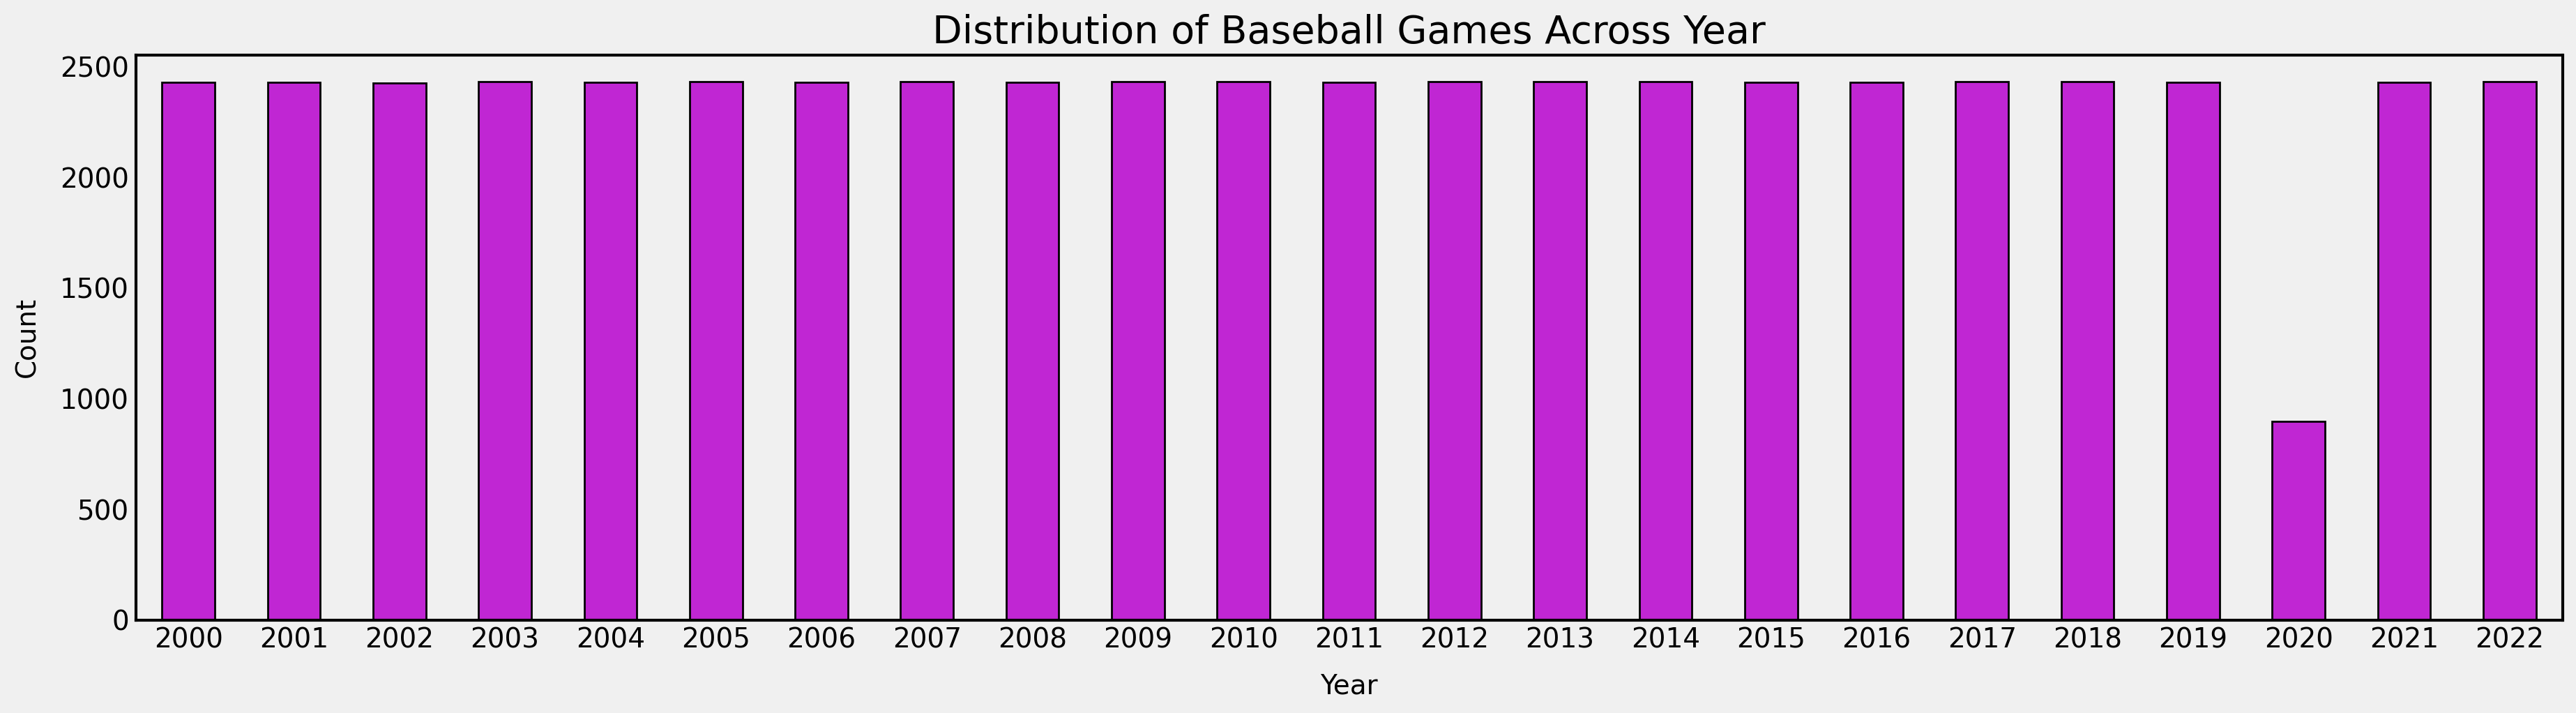

In [16]:
df['Year'] = df['Date'].transform(lambda x: x.year, axis=0)
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 5),
                                                 color='#C026D3', edgecolor='black',
                                                 linewidth=1)
ax.set_title('Distribution of Baseball Games Across Year', size=20)
ax.set_xlabel('Year', labelpad=10, size=14)
ax.set_ylabel('Count', labelpad=10, size=14)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

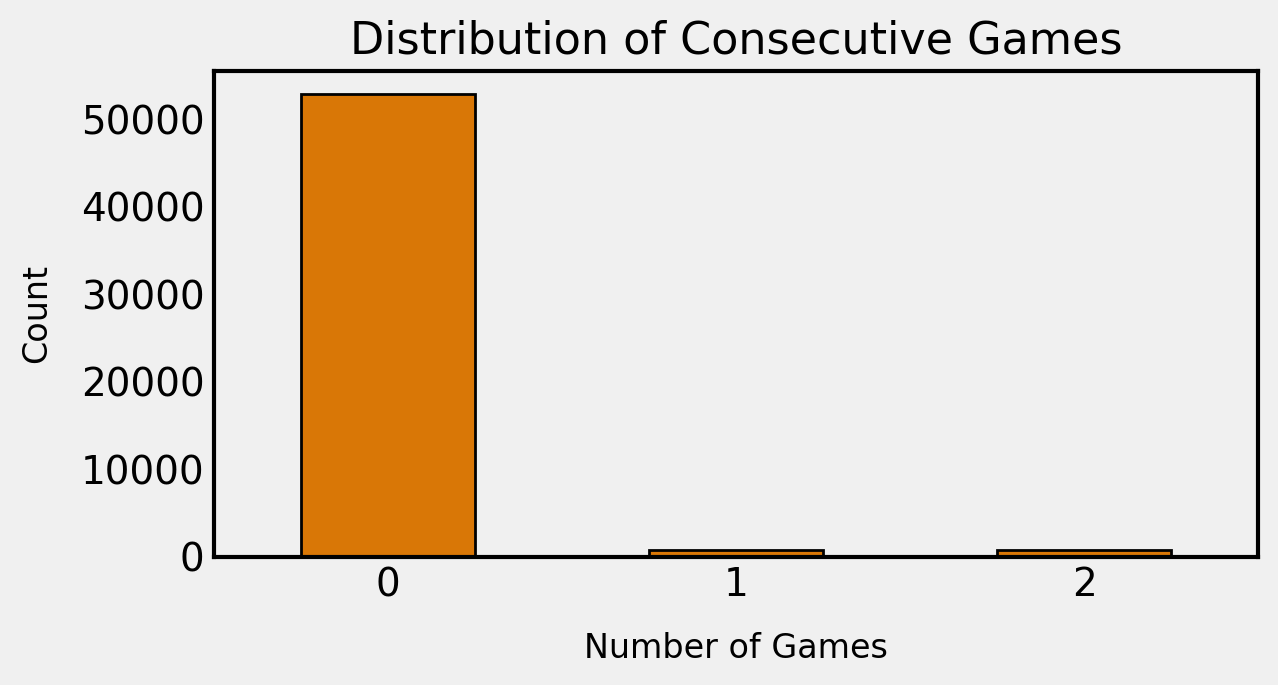

In [17]:
ax = df['NumberofGames'].value_counts().plot(kind='bar', figsize=(6, 3),
                                             color='#D97706', edgecolor='black',
                                             linewidth=1)
ax.set_title('Distribution of Consecutive Games', size=16)
ax.set_xlabel('Number of Games', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

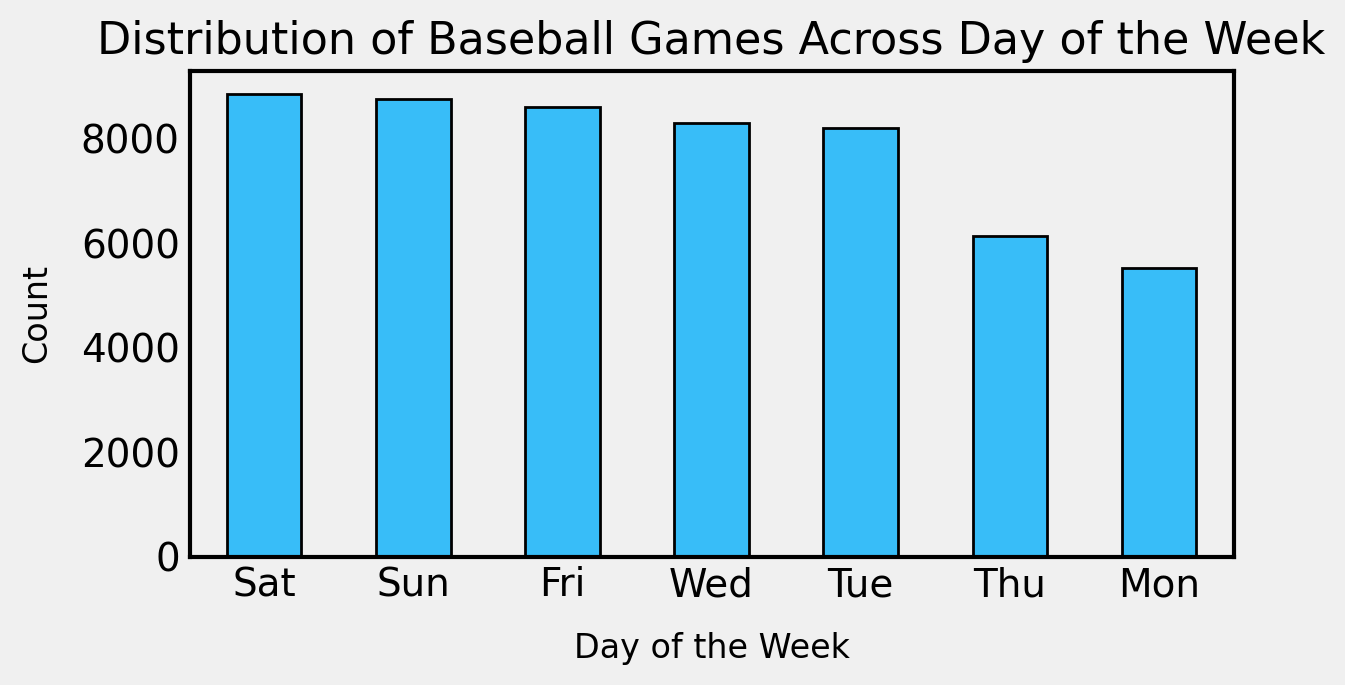

In [18]:
ax = df['DayofWeek'].value_counts().plot(kind='bar', figsize=(6, 3), color='#38BDF8',
                                         edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Day of the Week', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

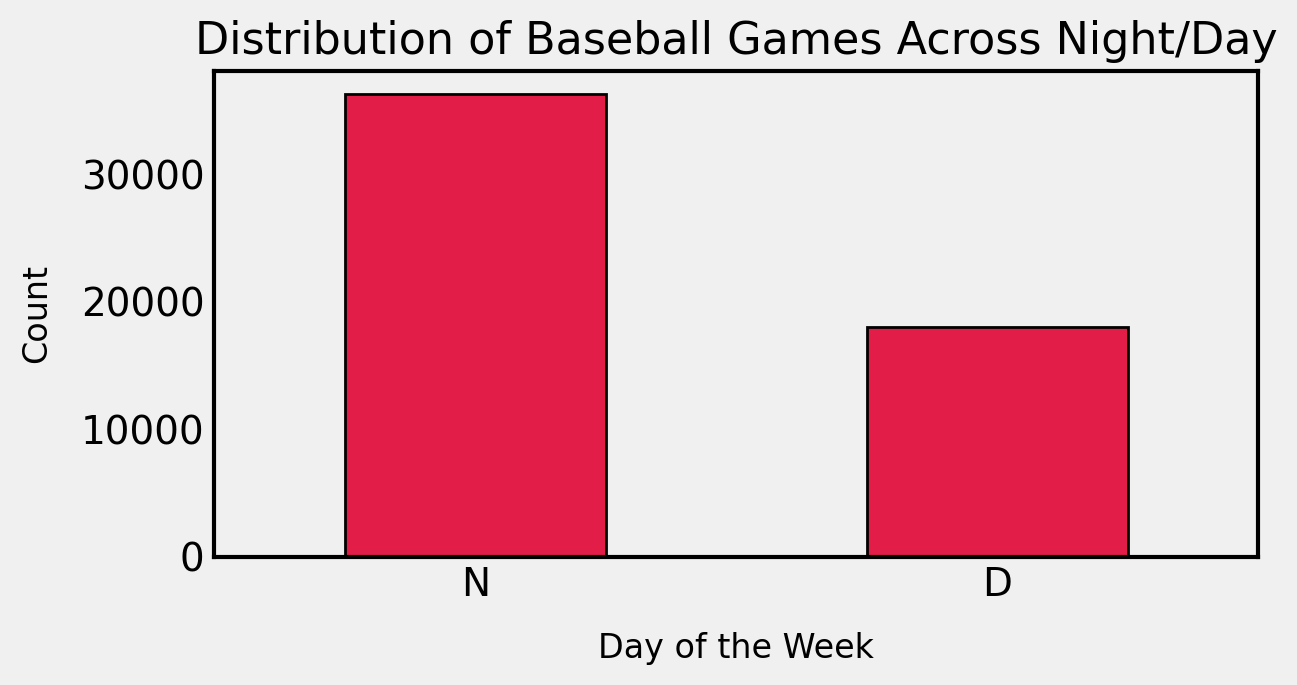

In [19]:
ax = df['DayNight'].value_counts().plot(kind='bar', figsize=(6, 3), color='#E11D48',
                                        edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Night/Day', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

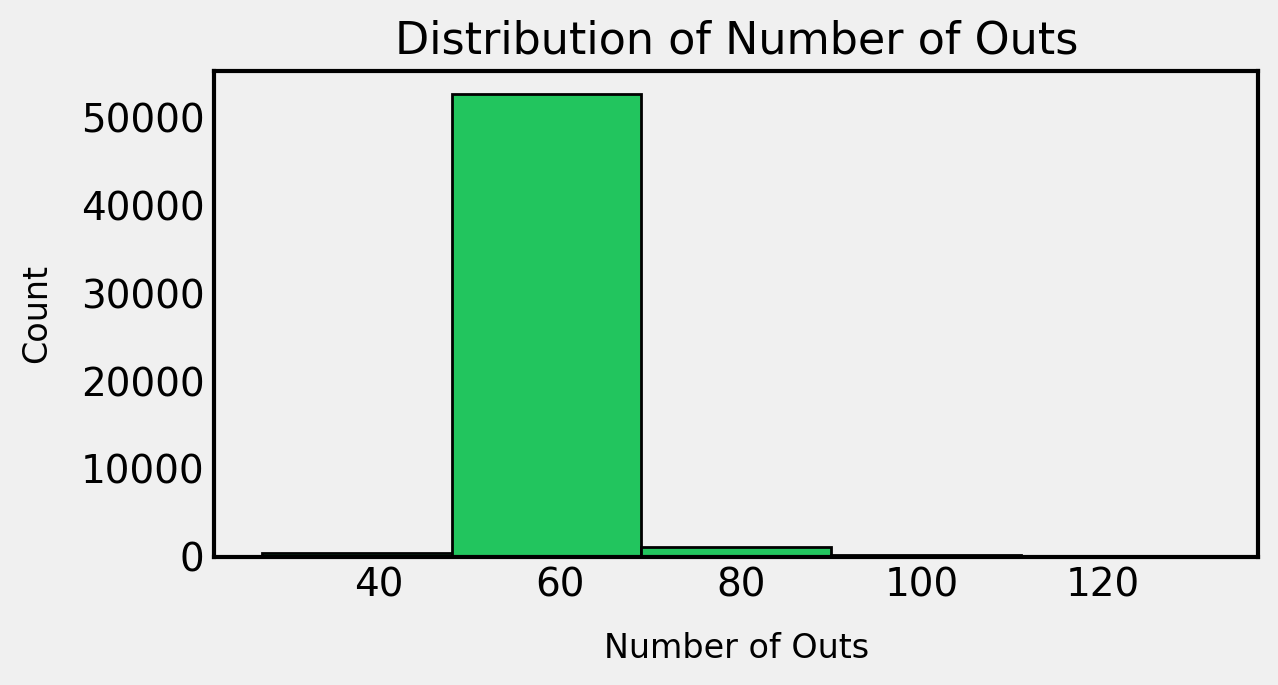

In [20]:
ax = df['NumberofOuts'].plot(kind='hist', figsize=(6, 3), color='#22C55E',
                             bins=5, edgecolor='black', linewidth=1)
ax.set_title('Distribution of Number of Outs', size=16)
ax.set_xlabel('Number of Outs', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

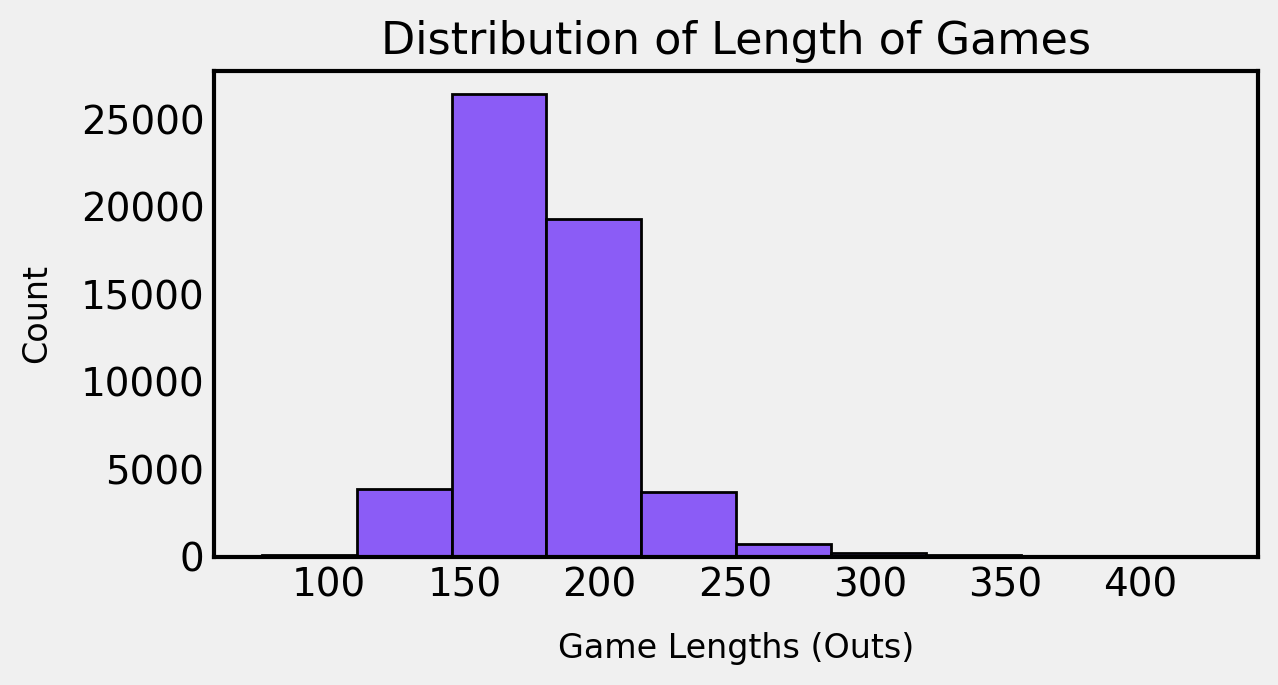

In [21]:
ax = df['LengthofGame'].plot(kind='hist', figsize=(6, 3), color='#8B5CF6', bins=10,
                             edgecolor='black', linewidth=1)
ax.set_title('Distribution of Length of Games', size=16)
ax.set_xlabel('Game Lengths (Outs)', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

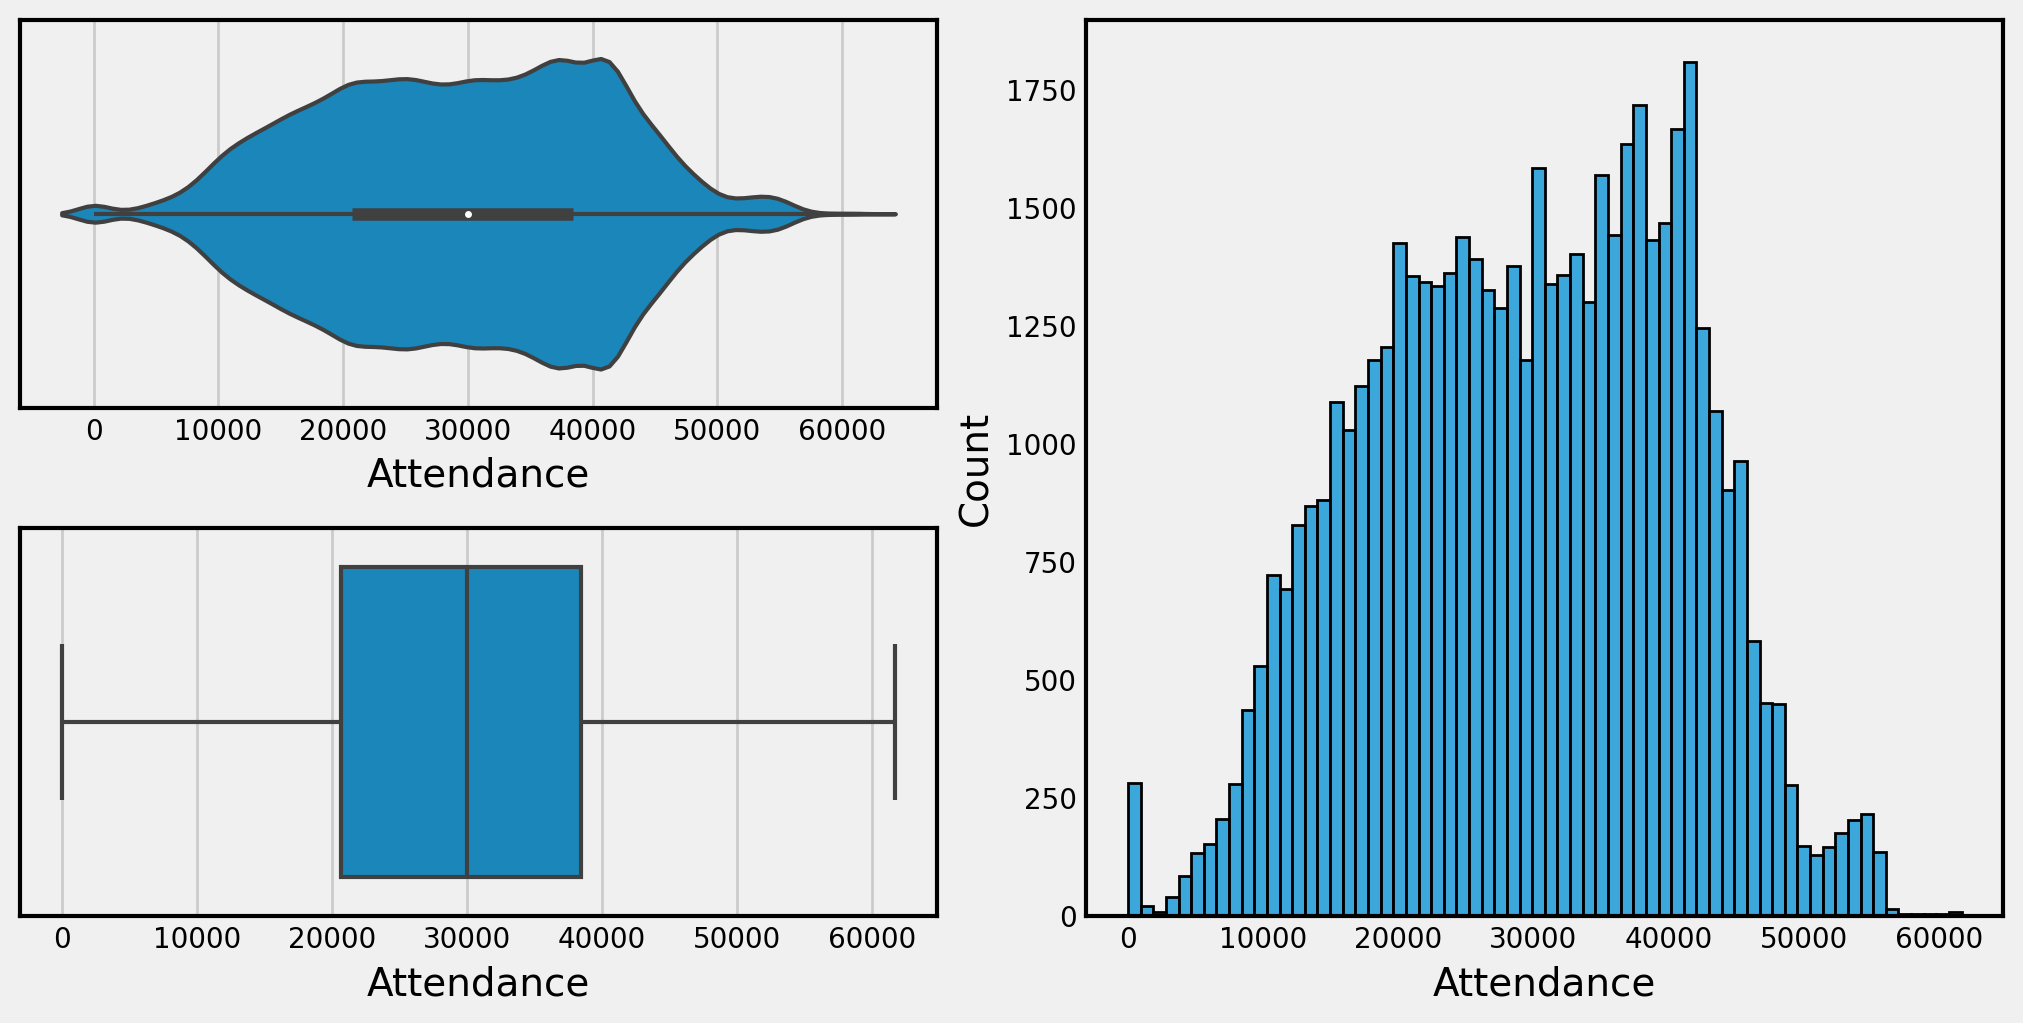

In [22]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 5), layout="constrained")
a = sns.violinplot(data=df, x='Attendance', linewidth=1.5, ax=axd['upper left'])
a1 = sns.boxplot(data=df, x='Attendance', linewidth=1.5, ax=axd['lower left'])
a2 = sns.histplot(data=df, x='Attendance', ax=axd['right'], edgecolor='black', linewidth=1)
a2.grid(False)
for k in axd.keys():
    axd[k].tick_params(axis='both', which='major', labelsize=10)

# Feature Relationships

In [23]:
df.head()

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,HomeTeamScore,NumberofOuts,DayNight,BallParkID,Attendance,LengthofGame,VisitingTeam_LineScore,HomeTeam_LineScore,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,HomePlateUmp_ID,HomePlateUmp_Name,1BUmp_ID,1BUmp_Name,2BUmp_ID,2BUmp_Name,3BUmp_ID,3BUmp_Name,LFUmp_Name,RFUmp_Name,VisitingTeamManager_ID,VisitingTeamManager_Name,HomeTeamManager_ID,HomeTeamManager_Name,WinningPitcher_ID,WinningPitcher_Name,LosingPitcher_ID,LosingPitcher_Name,SavingPitcher_Name,GameWinningRBIBatter_ID,GameWinningRBIBatter_Name,VisitingTeam_StartingPitcher_ID,VisitingTeam_StartingPitcher_Name,HomeTeam_StartingPitcher_ID,HomeTeam_StartingPitcher_Name,VisitingTeam_Player1_ID,VisitingTeam_Player1_Name,VisitingTeam_Player1_Position,VisitingTeam_Player2_ID,VisitingTeam_Player2_Name,VisitingTeam_Player2_Position,VisitingTeam_Player3_ID,VisitingTeam_Player3_Name,VisitingTeam_Player3_Position,VisitingTeam_Player4_ID,VisitingTeam_Player4_Name,VisitingTeam_Player4_Position,VisitingTeam_Player5_ID,VisitingTeam_Player5_Name,VisitingTeam_Player5_Position,VisitingTeam_Player6_ID,VisitingTeam_Player6_Name,VisitingTeam_Player6_Position,VisitingTeam_Player7_ID,VisitingTeam_Player7_Name,VisitingTeam_Player7_Position,VisitingTeam_Player8_ID,VisitingTeam_Player8_Name,VisitingTeam_Player8_Position,VisitingTeam_Player9_ID,VisitingTeam_Player9_Name,VisitingTeam_Player9_Position,HomeTeam_Player1_ID,HomeTeam_Player1_Name,HomeTeam_Player1_Position,HomeTeam_Player2_ID,HomeTeam_Player2_Name,HomeTeam_Player2_Position,HomeTeam_Player3_ID,HomeTeam_Player3_Name,HomeTeam_Player3_Position,HomeTeam_Player4_ID,HomeTeam_Player4_Name,HomeTeam_Player4_Position,HomeTeam_Player5_ID,HomeTeam_Player5_Name,HomeTeam_Player5_Position,HomeTeam_Player6_ID,HomeTeam_Player6_Name,HomeTeam_Player6_Position,HomeTeam_Player7_ID,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Acquisition_Information,Year
0,2000-03-29,0,Wed,CHN,NL,1,NYN,NL,1,5,3,54,N,TOK01,55000.0,206,100010210,001000020,33,12,1,0,2,5,1,0,1,10,0,5,1,0,4,0,13,3,3,3,0,0,27,10,2,0,1,0,33,7,1,0,1,3,1,1,0,3,0,4,0,0,1,0,8,5,5,5,1,0,27,12,0,0,4,0,marsr901,Rand

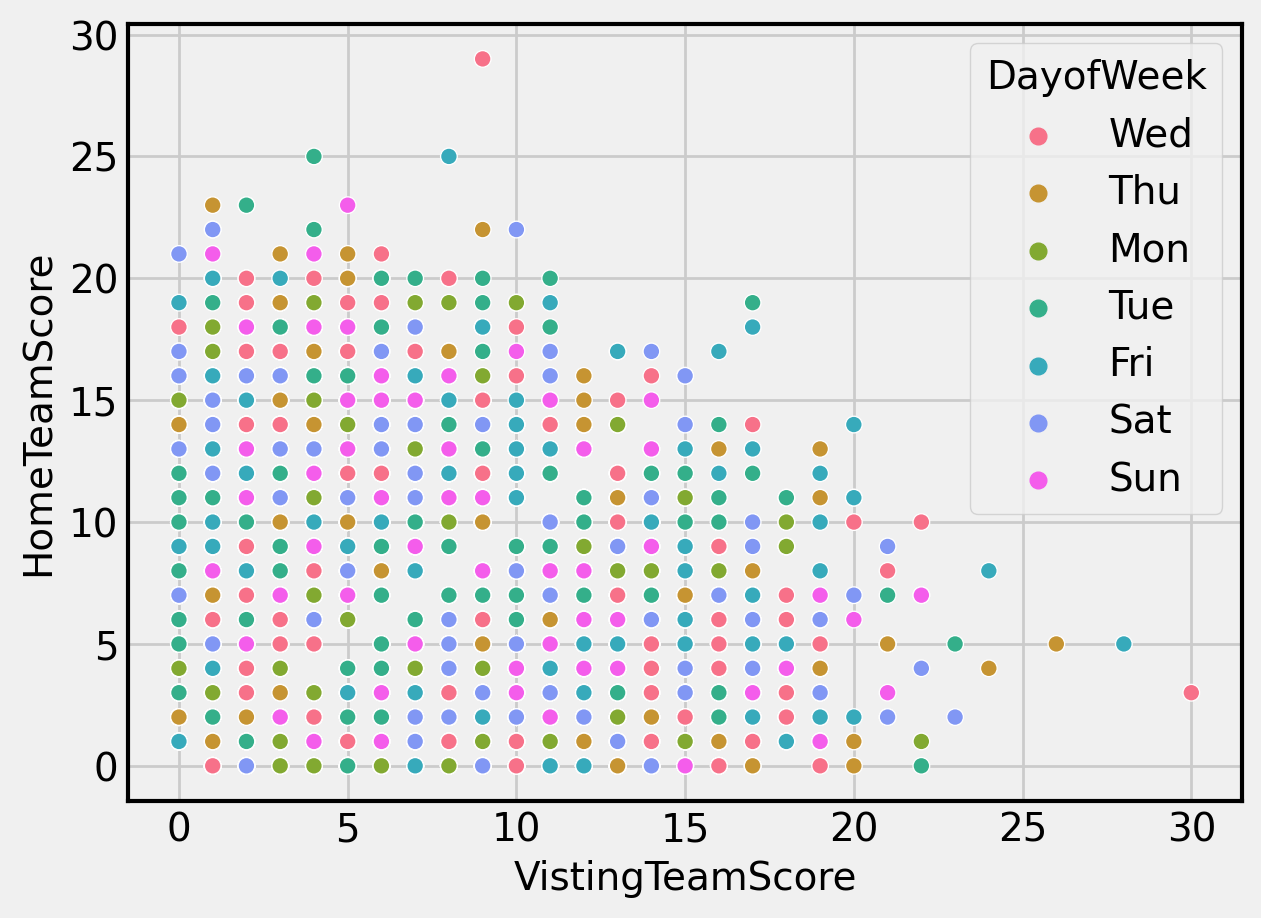

In [30]:
ax = sns.scatterplot(data=df, x='VistingTeamScore', y='HomeTeamScore', hue='DayofWeek')

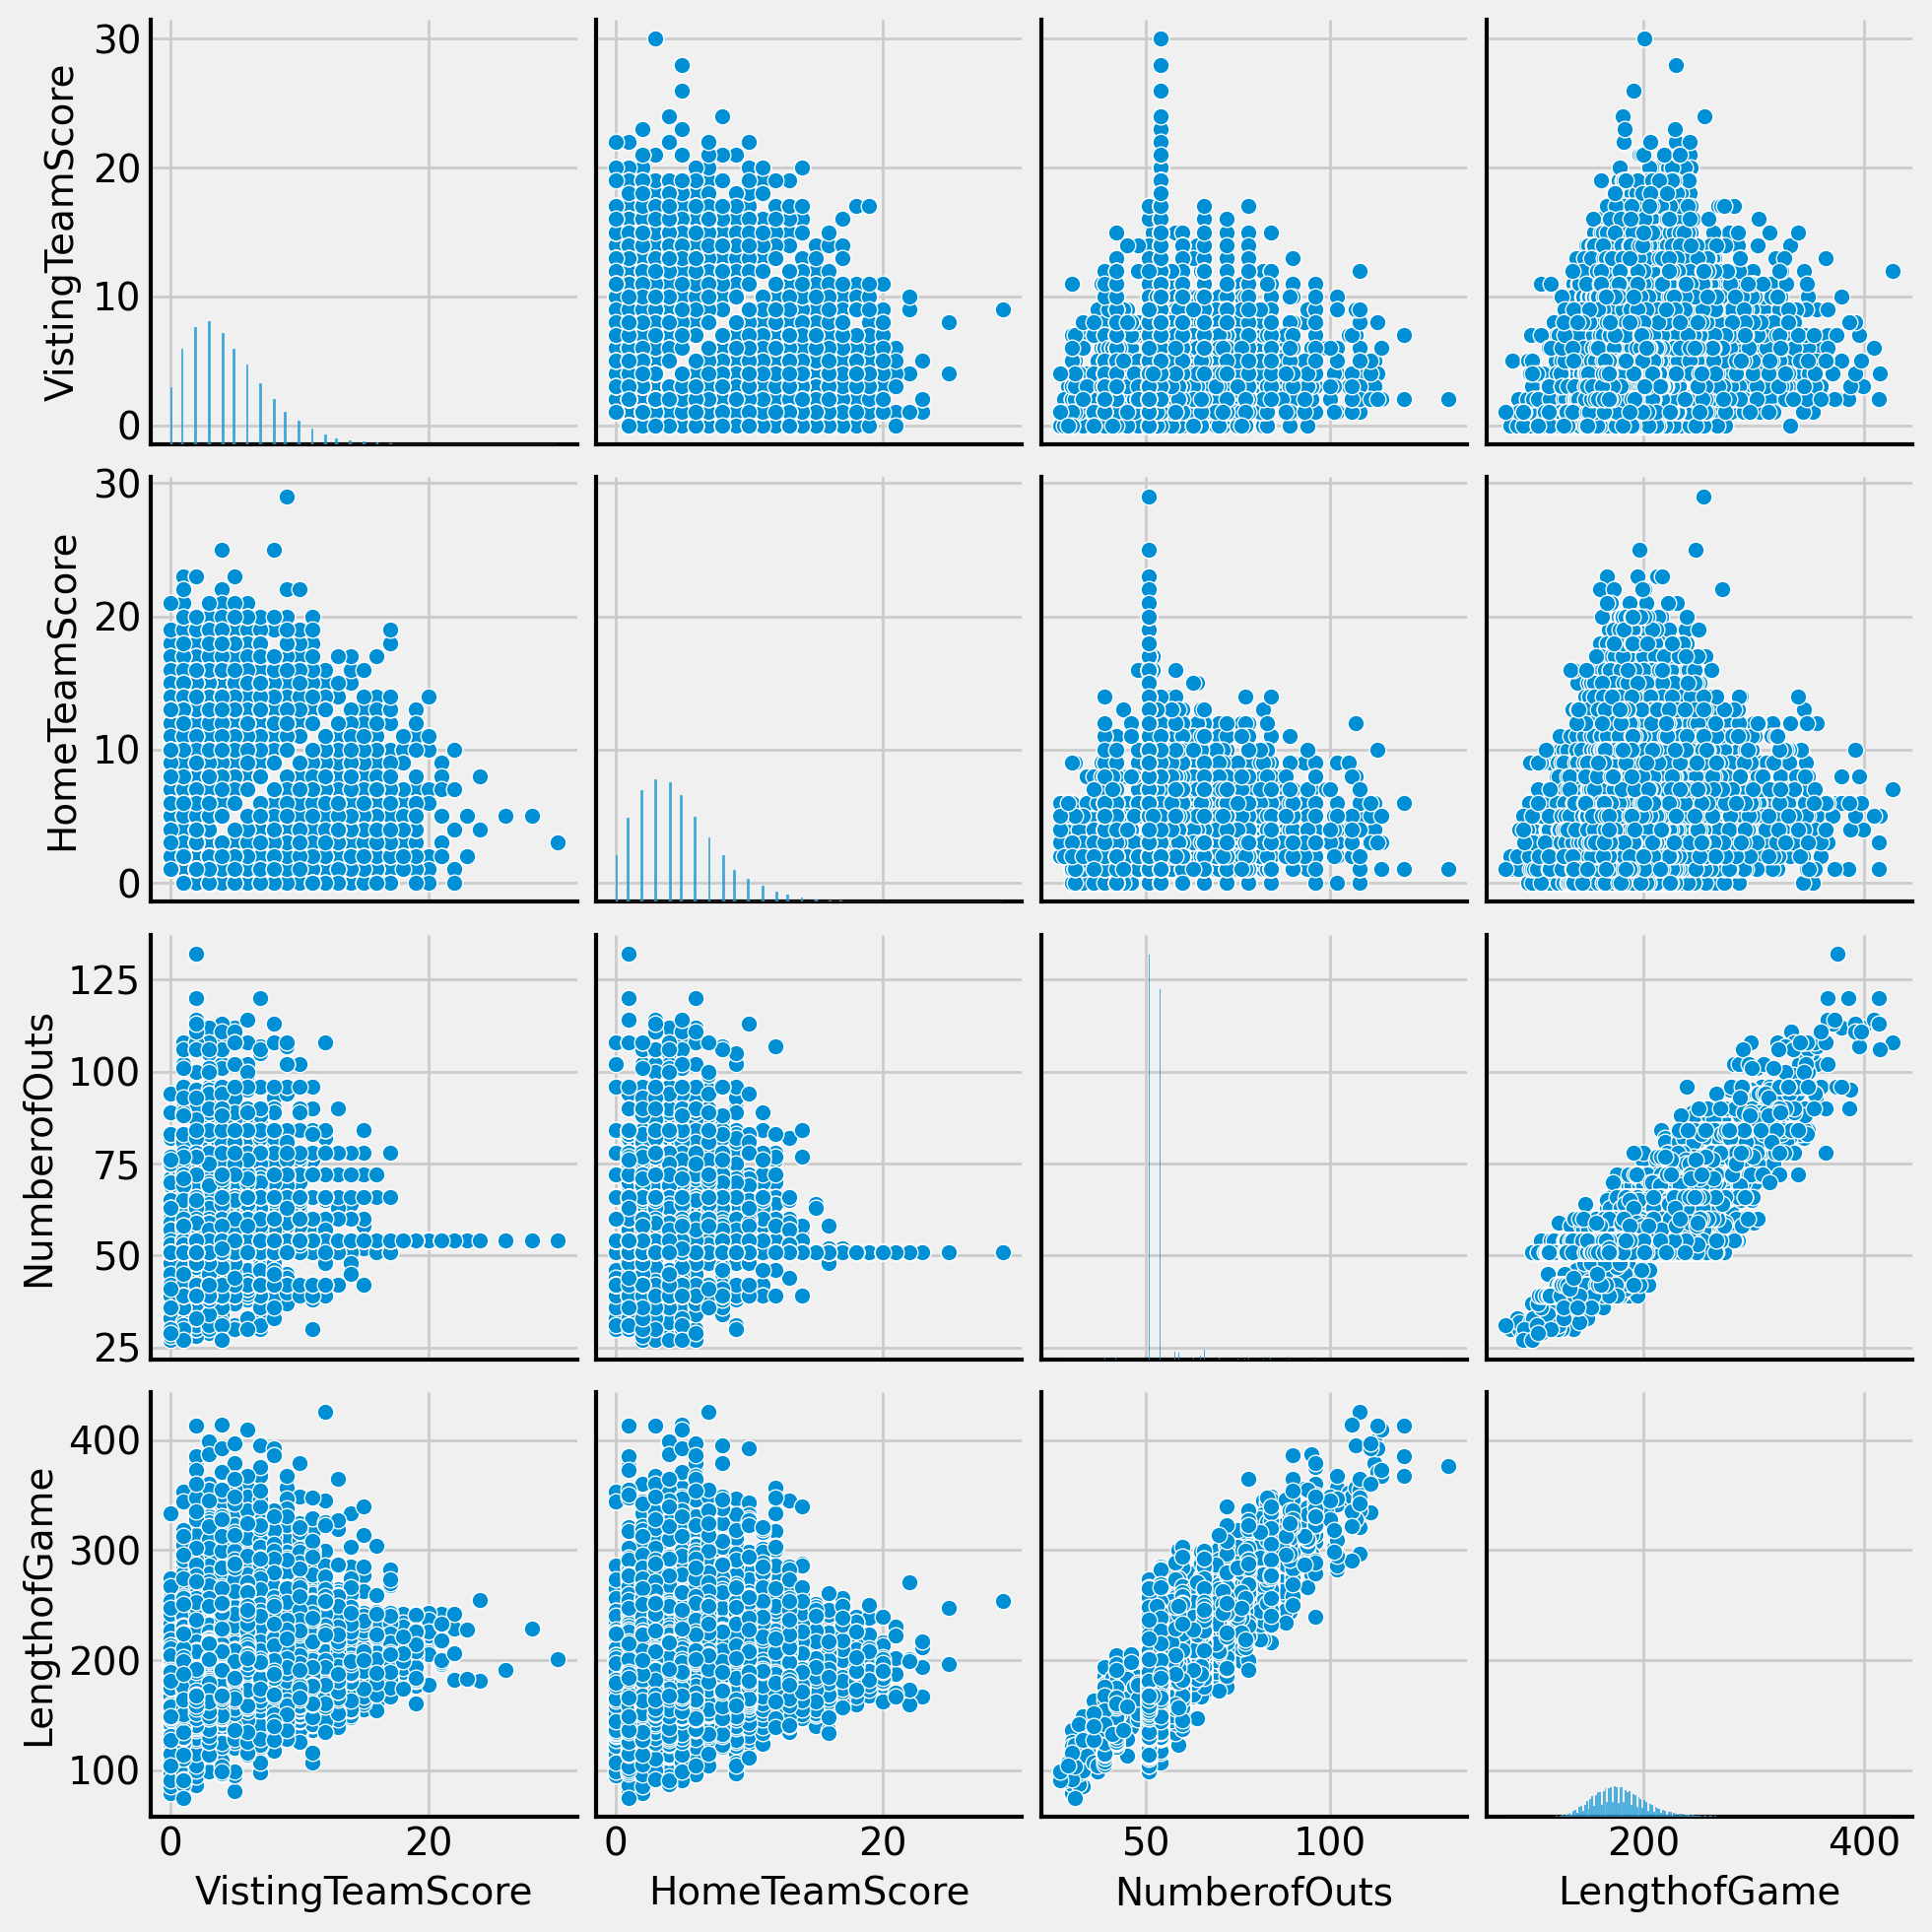

In [32]:
sns.pairplot(data=df,
             vars=['VistingTeamScore', 'HomeTeamScore',
                     'NumberofOuts', 'LengthofGame'])

In [42]:
corr = df.select_dtypes(['int', 'float']).corr(method='pearson')

<Axes: >

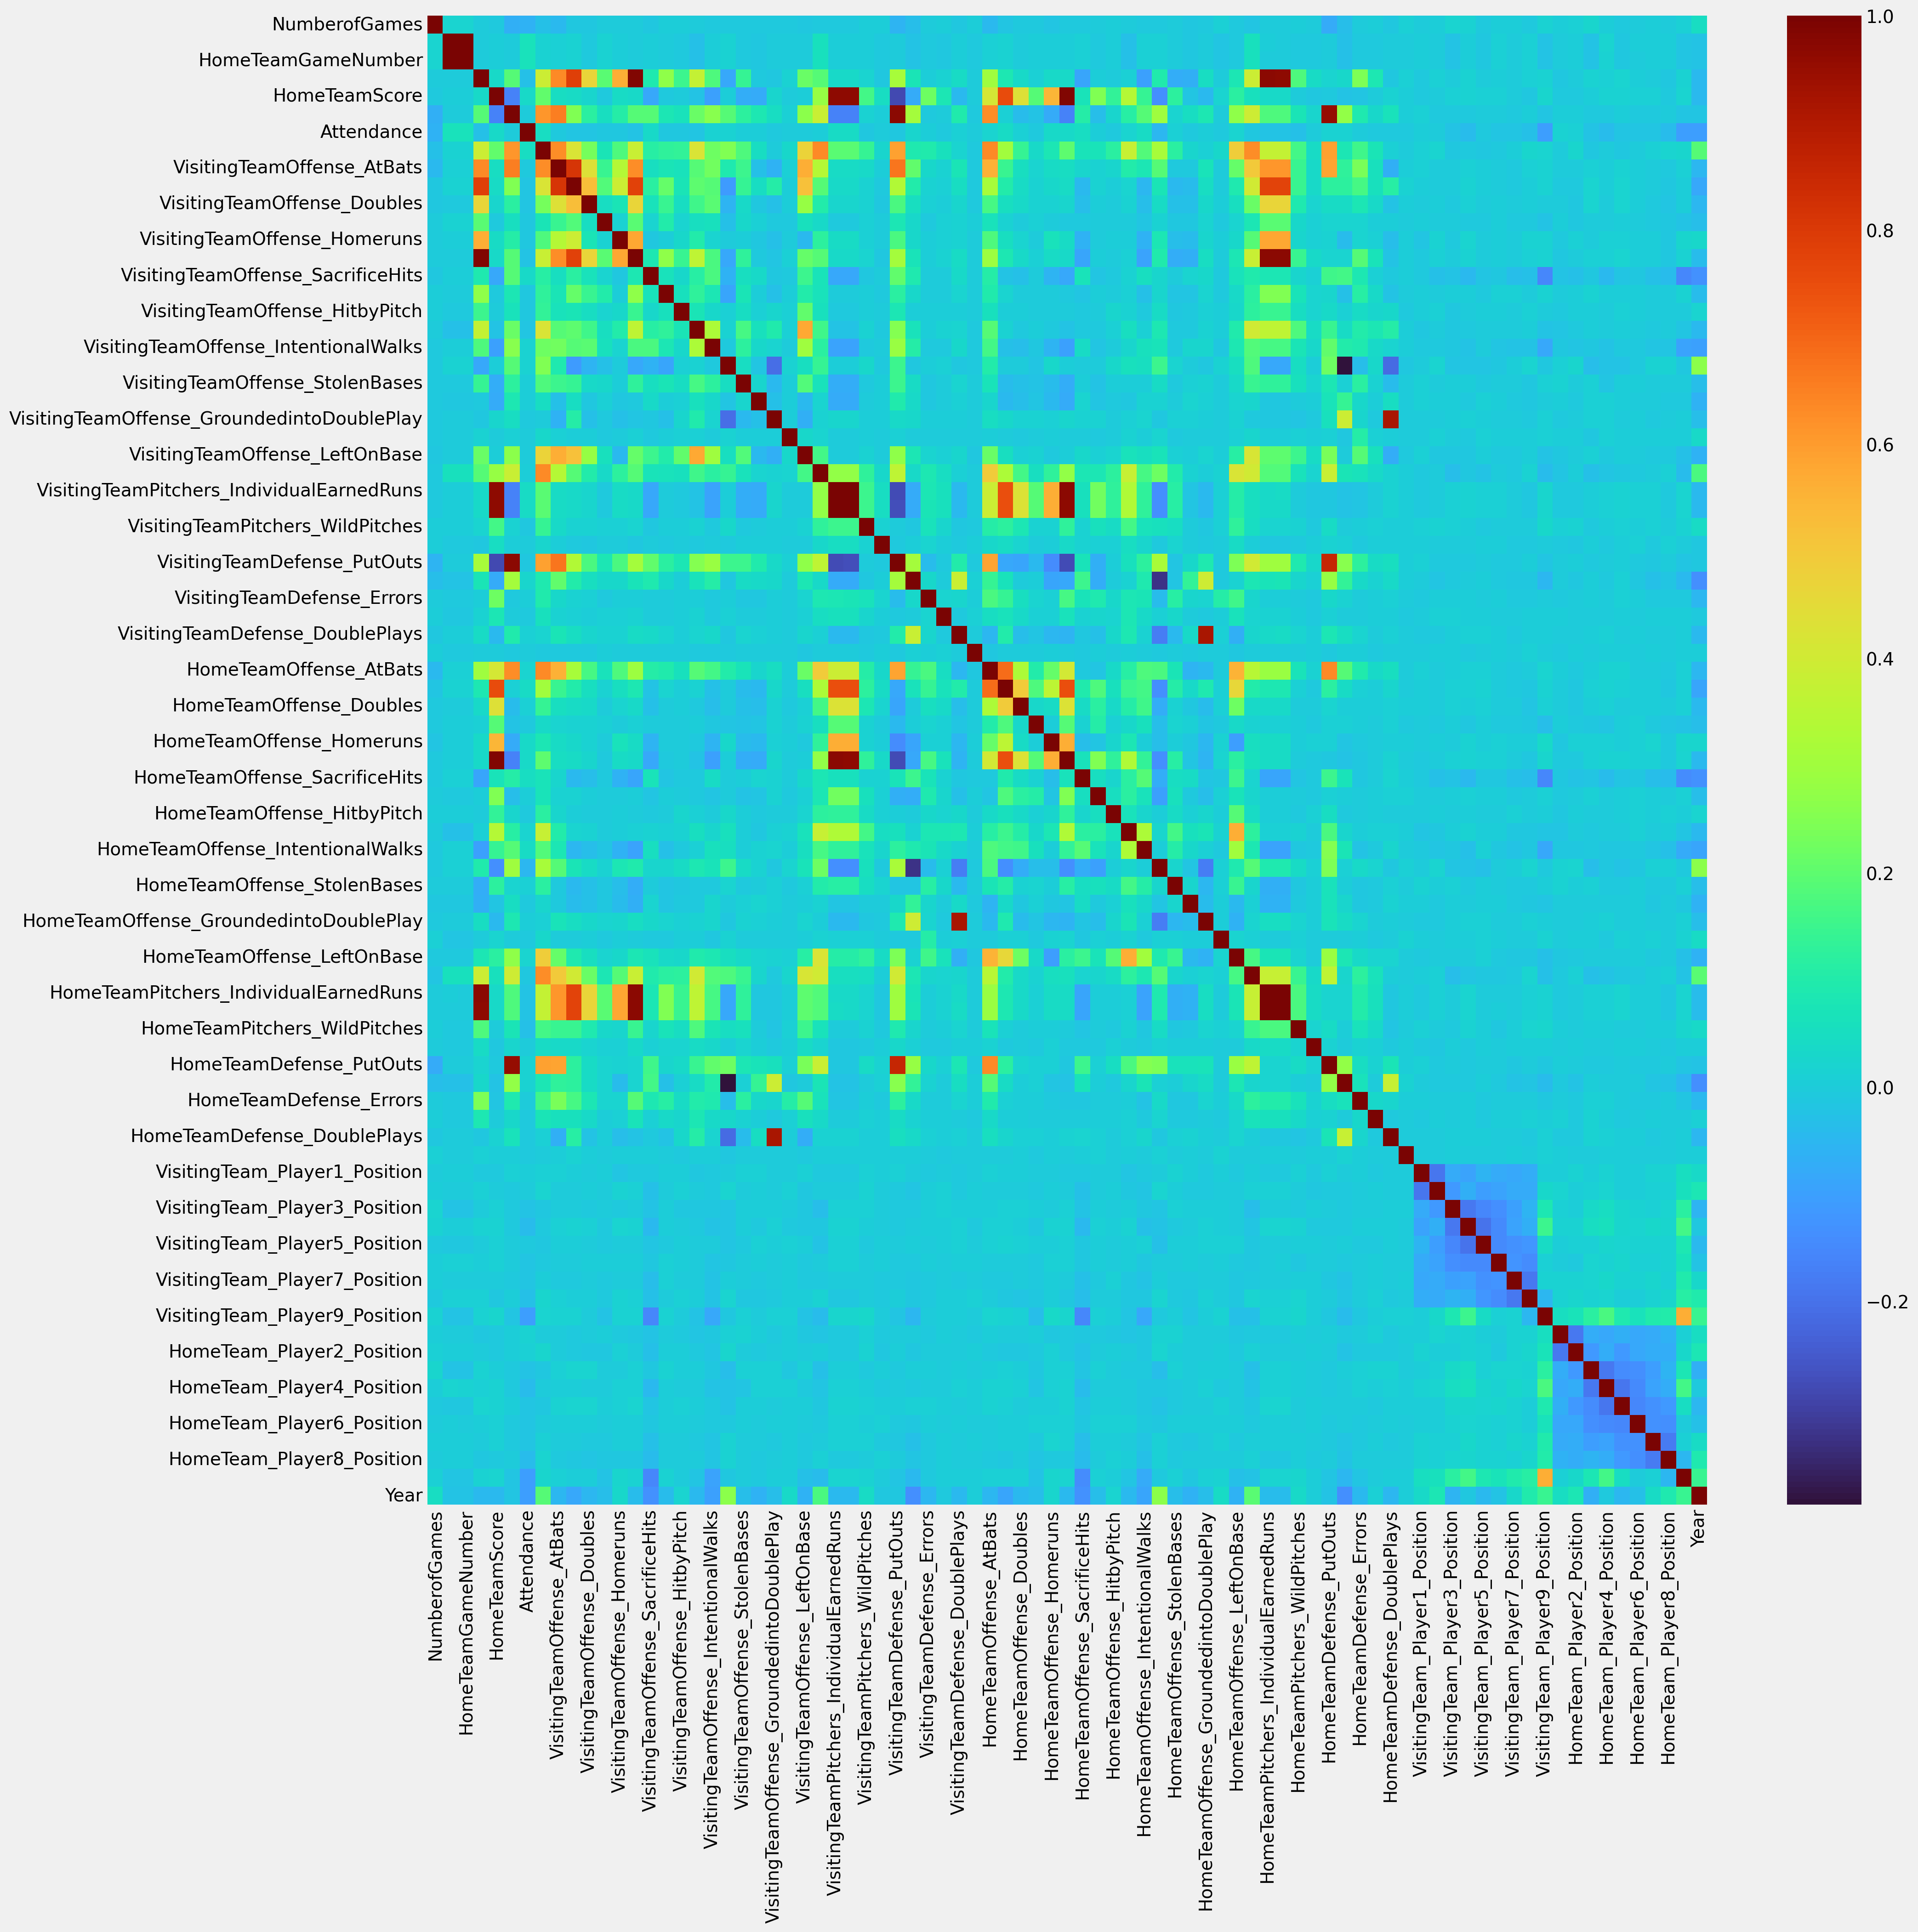

In [40]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)

In [53]:
# filter by top 10 strongest correlations with attendance excluding attendance with itself
corr.loc[corr.index != 'Attendance', 'Attendance'].abs().sort_values(ascending=False)

HomeTeam_Player9_Position            0.105006
Year                                 0.104714
VisitingTeam_Player9_Position        0.104659
VisitingTeamGameNumber               0.064802
HomeTeamGameNumber                   0.064650
                                       ...   
VisitingTeamPitchers_PitchersUsed    0.001945
VisitingTeamOffense_LeftOnBase       0.000728
VisitingTeamPitchers_Balks           0.000401
NumberofOuts                         0.000127
VisitingTeamDefense_TriplePlays      0.000013
Name: Attendance, Length: 82, dtype: float64